In [1]:
# Ich werde jetzt versuchen den Datensatz: "P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv" auf ein intervall von (-1) bis 1 zu Normalisieren. Genauere Überlegungen und Gedanken zu einzelnen Schritten findet ihr in der WhatsApp Gruppe :)
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import data_cleanup as dc



In [2]:
fpath = '../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv'
df = pd.read_csv(fpath)
datensatz_normalisiert = dc.normalisierung(df)
print(datensatz_normalisiert.DMS_score.head(50))

0    -0.788753
1    -0.390196
2    -0.193883
3    -0.467448
4     0.011024
5     0.100321
6    -0.236274
7    -0.546207
8    -0.360615
9    -0.626371
10   -0.409696
11   -0.442996
12    0.596781
13    0.383611
14   -0.107581
15    0.383611
16   -0.205230
17    0.159216
18   -0.400862
19    0.255420
20    0.221474
21    0.108127
22    0.304769
23    0.243608
24    0.165312
25    0.314797
26    0.433769
27    0.291120
28    0.101538
29    0.323085
30    0.323993
31    0.299789
32    0.223631
33   -0.133037
34    0.305915
35    0.273409
36    0.196597
37    0.254888
38    0.276036
39   -0.023089
40    0.225787
41    0.310739
42    0.126354
43    0.243178
44    0.324529
45    0.328382
46    0.293550
47   -0.162292
48    0.280082
49    0.311064
Name: DMS_score, dtype: float64


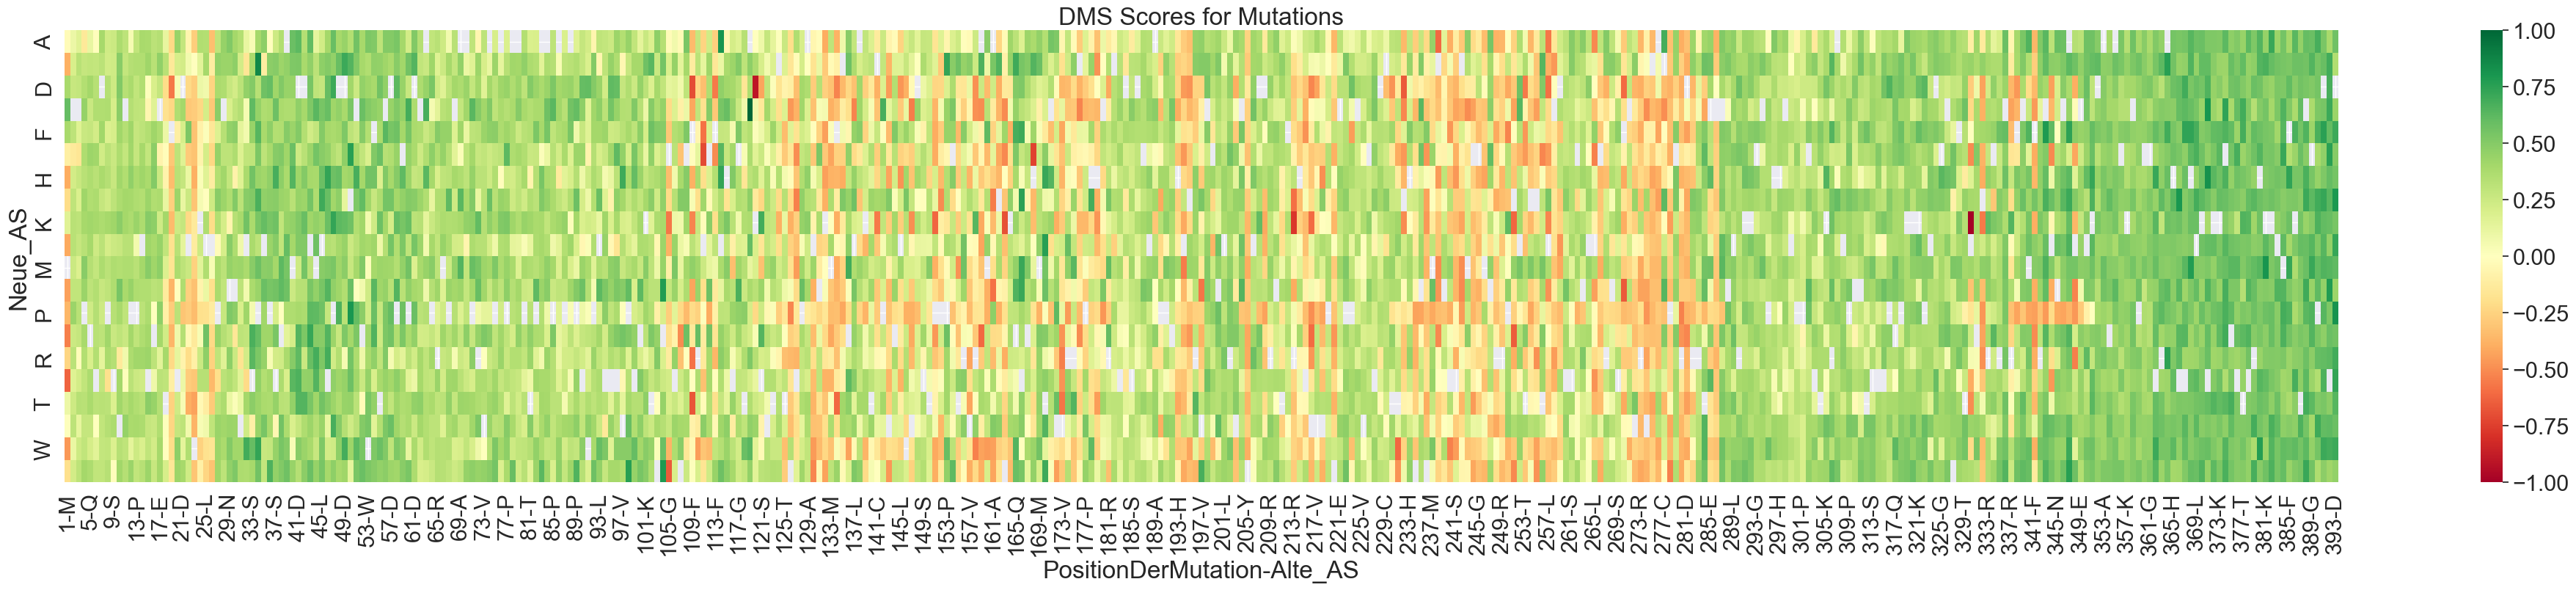

In [82]:
#Jetzt will ich die normalisierten Daten mal heatmappen

NormalisierungsDatensatz['PositionDerMutation'] = NormalisierungsDatensatz["mutant"].apply(lambda x: re.search(r'\d+', x).group())
#Hier wird in einer neuen Spalte von "Datensatz1" namens "Alte_AS" die ausgängliche Aminosäure ausgelesen und gespeichert
NormalisierungsDatensatz['Alte_AS'] = NormalisierungsDatensatz["mutant"].apply(lambda x: re.search(r'[A-Z]', x).group())
#Hier wird in einer neuen Spalte von "Datensatz1" namens "Neue_AS" die neue (mutierte) Aminosäure ausgelesen und gespeichert
NormalisierungsDatensatz['Neue_AS'] = NormalisierungsDatensatz["mutant"].apply(lambda x: re.search(r'[A-Z]\d+([A-Z])', x).group(1))
#In einer neuen ".csv" Datei names "DarioHeatMapTest" werden nun die ausgänglichen Daten und die "neu gewonnenen" Daten vereint
NormalisierungsDatensatz.to_csv('DarioHeatMapTestNormalisiert.csv', index=False)


HeatMapTestNormalisiert = NormalisierungsDatensatz.pivot(index='Neue_AS', columns=['PositionDerMutation', "Alte_AS"], values='DMS_score')
plt.figure(figsize=(50, 8))
sns.set(font_scale=2)
sns.heatmap(HeatMapTestNormalisiert, cmap='RdYlGn')
#Sie soll den Namen "DMS Scores fpr Mutations" tragen
plt.title('DMS Scores for Mutations')
#Hiermit gebe ich die Heatmap aus
plt.show()

In [85]:
# Jetzt möchte ich versuchen die Positionen der Aminosäurensequenz die sich bei Mutation am besten bzw schlechtesten auswirken
########
#FAs1 = 0
#counter = 0
#while counter < 19:
    #FAs1 = (FAs1) + float(NormalisierungsDatensatz.iloc[counter, 2])
    #counter = counter + 1
    #print(counter)
    #print(FAs1)
#print(FAs1)
#######
column_names = ['Position', 'Summe der DMS_scores aller Mutationen']
FAs1 = pd.DataFrame(columns=column_names)
counter_for = 1
laenge = list(range(1, 394))
FAs1['Position'] = laenge
FAs1int = 0.0
for counter_for in range(393):
    counter_while = 0
    while counter_while < 19:
        FAs1int = FAs1int + float(NormalisierungsDatensatz.iloc[counter_for * counter_while, 2])
        #print(FAs1int)
        FAs1[counter_for, 'Summe der DMS_scores aller Mutationen'] = FAs1int
        counter_while = counter_while + 1
        #print(counter_while)
print(FAs1.head(393))


def sortierung(seq_length: int, frame: pd.DataFrame) -> pd.DataFrame:
    """Diese Funktion gibt ein DataFrame zurück, welches alle Aminosären nach ihrer Position in eine Spalte packt"""

    returnFrame: pd.DataFrame = pd.DataFrame(columns=[f'Position{i}' for i in range(seq_length)])

    for mut in frame.mutant:
        # Das funktioniert noch nicht so wirklich - syntax steht noch nicht
        returnFrame[f'Position{mut.index(1)}'].append() = frame.DMS_Score(Position mut)

    return returnFrame



     Position Summe der DMS_scores aller Mutationen   
0           1                                   NaN  \
1           2                                   NaN   
2           3                                   NaN   
3           4                                   NaN   
4           5                                   NaN   
..        ...                                   ...   
388       389                                   NaN   
389       390                                   NaN   
390       391                                   NaN   
391       392                                   NaN   
392       393                                   NaN   

     (0, Summe der DMS_scores aller Mutationen)   
0                                     -0.488863  \
1                                     -0.488863   
2                                     -0.488863   
3                                     -0.488863   
4                                     -0.488863   
..                               

/var/folders/rs/slvnklp9225dt2111t5ml2vh0000gn/T/ipykernel_61471/2793552210.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  FAs1[counter_for, 'Summe der DMS_scores aller Mutationen'] = FAs1int
/var/folders/rs/slvnklp9225dt2111t5ml2vh0000gn/T/ipykernel_61471/2793552210.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  FAs1[counter_for, 'Summe der DMS_scores aller Mutationen'] = FAs1int
/var/folders/rs/slvnklp9225dt2111t5ml2vh0000gn/T/ipykernel_61471/2793552210.py:23: PerformanceWarning: DataFrame is highly fragmented.  Th